In [2]:
import scipy.special,scipy.misc
import numpy
import matplotlib.pyplot
%matplotlib inline

class Neurol:
    def __init__(self,input_nodes,hidden_nodes,output_nodes,learningrate):
        self.i_n=input_nodes
        self.h_n=hidden_nodes
        self.o_n=output_nodes
        
        self.wih = numpy.random.normal(0.0, pow(self.i_n,-0.5),(self.h_n,self.i_n))
        self.who=numpy.random.normal(0.0,pow(self.h_n,-0.5 ),(self.o_n,self.h_n))
        
        self.l_r= learningrate
        
        self.activate=lambda x: scipy.special.expit(x)
        
    
    
    def train(self,inputs_l,targets_l):
        ins = numpy.array(inputs_l, ndmin=2).T
        tgs = numpy.array(targets_l, ndmin=2).T
        
        
        h_ins = numpy.dot(self.wih, ins)
        h_ots = self.activate(h_ins)
        
        
        final_ins = numpy.dot(self.who, h_ots)
        final_ots = self.activate(final_ins)
        
        
        ots_errs = tgs - final_ots
        h_errs = numpy.dot(self.who.T, ots_errs) 
        
        
        self.who += self.l_r * numpy.dot((ots_errs * final_ots * (1.0 - final_ots)), numpy.transpose(h_ots))
        self.wih += self.l_r * numpy.dot((h_errs * h_ots * (1.0 - h_ots)), numpy.transpose(ins))
        
        
        
    
    
    
    def query(self,inputs_l):
        ins=numpy.array(inputs_l,ndmin=2).T
        h_ins=numpy.dot(self.wih,ins)
        h_ots=self.activate(h_ins)
        final_ins=numpy.dot(self.who,h_ots)
        final_ots=self.activate(final_ins)
        
        return final_ots
        
    
    
    
    
input_nodes=784
hidden_nodes=100
output_nodes=10
learningrate=0.1

n=Neurol(input_nodes,hidden_nodes,output_nodes,learningrate)

training_data_file=open('fashion-mnist_train.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()
epochs=3

for i in range(epochs):   
    for record in training_data_list[1:]:
        all_values=record.split(',')
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
    pass
    

In [3]:
test_data_file=open('fashion-mnist_test.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()
all_values=test_data_list[1].split(',')
print(all_values[1])

0


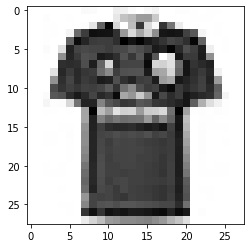

In [4]:
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')


In [5]:
scorecard=[]

for record in test_data_list[1:]:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    
    if label==correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass
t=len(test_data_list)
k=sum(scorecard)

effect=(k/t)*100

print(effect)





83.64163583641636


[[3.24307458e-03]
 [1.38164890e-03]
 [7.98522865e-03]
 [4.35531592e-02]
 [4.92005104e-03]
 [3.00225039e-01]
 [1.24886206e-02]
 [9.78467268e-02]
 [3.23612052e-01]
 [5.33035497e-05]]
сумка


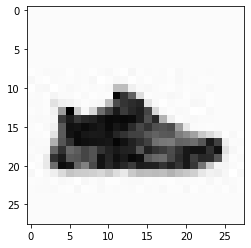

In [21]:
from PIL import Image
ans=['футболка','брюки','свитер','платье','пальто','туфли','рубашка','кросовки','сумка','ботинки']

img_arr = Image.open('test7.jpg')
img_arr = img_arr.convert('L') # делаем черно-белым
img_arr = numpy.asarray(img_arr)


img_data=255.0-img_arr.reshape(784)


img_data=(numpy.asfarray(img_data)/255.0*0.99)+0.01


output=n.query(img_data)
print(output)
print(ans[numpy.argmax(output)])

img_data=numpy.asfarray(img_data).reshape((28,28))
matplotlib.pyplot.imshow(img_data,cmap='Greys',interpolation='None')

[[4.61474608e-03]
 [1.85399462e-02]
 [6.03380596e-04]
 [2.73486099e-03]
 [1.72746906e-03]
 [2.07976138e-02]
 [3.69210127e-03]
 [9.57745036e-01]
 [3.25991114e-02]
 [3.90327722e-03]]
кросовки


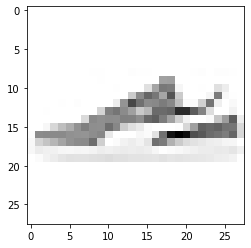

In [16]:
test_data_file=open('fashion-mnist_test.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[179].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')
inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01

output=n.query(inputs)
print(output)
print(ans[numpy.argmax(output)])